In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

<img src="pict/gini_tree.png" width="500" />

In [2]:
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

<img src="pict/misclassification_tree.png" width="500" />

In [3]:
print( gini(900/1000) )
print( gini(100/1000) )
print( gini(100/800) )
print( gini(200/200) )

0.17999999999999997
0.18
0.21875
0.0


<img src="pict/entropy_tree.png" width="500" />

In [4]:
print( entropy(900/1000) )
print( entropy(100/1000) )
print( entropy(100/800) )
print( scipy.stats.entropy(200/200) )

0.4689955935892811
0.4689955935892812
0.5435644431995964
0.0


In [5]:
print( classification_error(900/1000) )
print( classification_error(100/1000) )
print( classification_error(100/800) )
print( classification_error(200/200) )

0.09999999999999998
0.09999999999999998
0.125
0.0


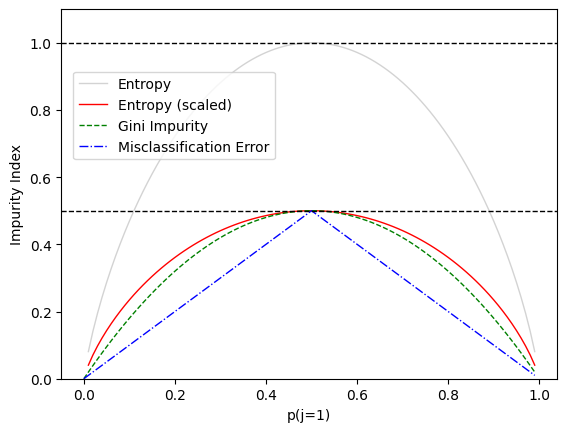

In [6]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()